# Análisis de pacientes con deficiencia de vitamina D Utilizando Machine learning

En esta nota abordaremos el análisis del estado del arte en la predicción de deficiencia de vitamina D mediante inteligencia artificial, empezando con una revisión de literatura científica para identificar los algoritmos más eficaces. Posteriormente, implementaremos los algoritmos destacados con datos propios, buscando evaluar su efectividad en nuevas poblaciones. El objetivo es sintetizar las tendencias actuales y explorar la aplicabilidad de las técnicas de IA más prometedoras para mejorar la detección y prevención de esta deficiencia nutricional.



---


In this note we will address the analysis of the state of the art in predicting vitamin D deficiency through artificial intelligence, starting with a review of scientific literature to identify the most effective algorithms. Subsequently, we will implement the highlighted algorithms with our own data, seeking to evaluate their effectiveness in new populations. The goal is to synthesize current trends and explore the applicability of the most promising AI techniques to improve the detection and prevention of this nutritional deficiency.



## Estado del arte

In [ ]:
!pip install pandas matplotlib wordcloud
!pip install squarify

### Palabras clave más comunes

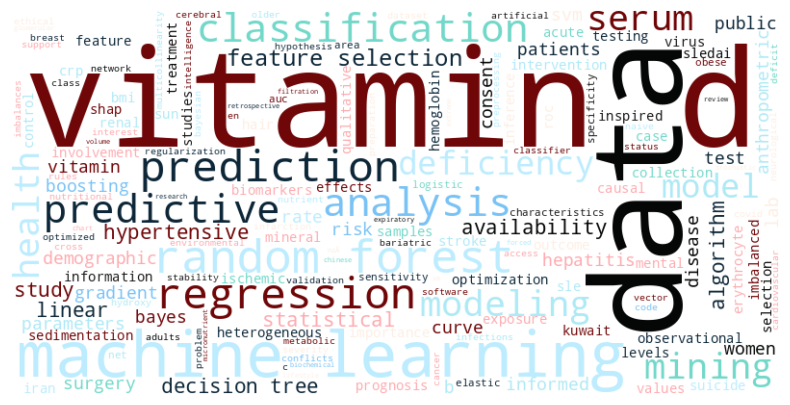

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import random

# Cargar datos desde un archivo CSV
palabras = '/content/palabras_clave_v2.csv'
df_palabras = pd.read_csv(palabras, encoding='ISO-8859-1', sep=';')
areas = '/content/area apliacion.csv'
df_areas = pd.read_csv(areas, encoding='ISO-8859-1', sep=';')

# Combinar todas las palabras clave en una única cadena de texto
text = ' '.join(df_palabras['PalabraClave'].values)

# Colores personalizados
colores = [
    "#AEE9F6",  # azul aguamarina
    "#0D2739",  # azul tipografía
    "#700507",  # rojo
    "#72D8C9",  # turquesa relleno
    "#FFFFFF",  # blanco fondo
    "#FEABB0",  # rosa
    "#161514",  # café borde
    "#6F0608",  # lacre bordes
    "#BCECFE",  # turquesa clarito
    "#FDEEE3",  # color piel
    "#FEAAAF",  # rosa pinkie
    "#79C2F5",  # azul claro
    "#0D2739",  # azul oscuro
    "#050606"   # negro texto
]

# Función de color personalizada
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(colores)

# Crear y configurar la nube de etiquetas
wordcloud = WordCloud(width = 800, height = 400, background_color ='white', color_func=color_func).generate(text)

# Mostrar la nube de etiquetas
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Distribución de Estudios sobre Vitamina D

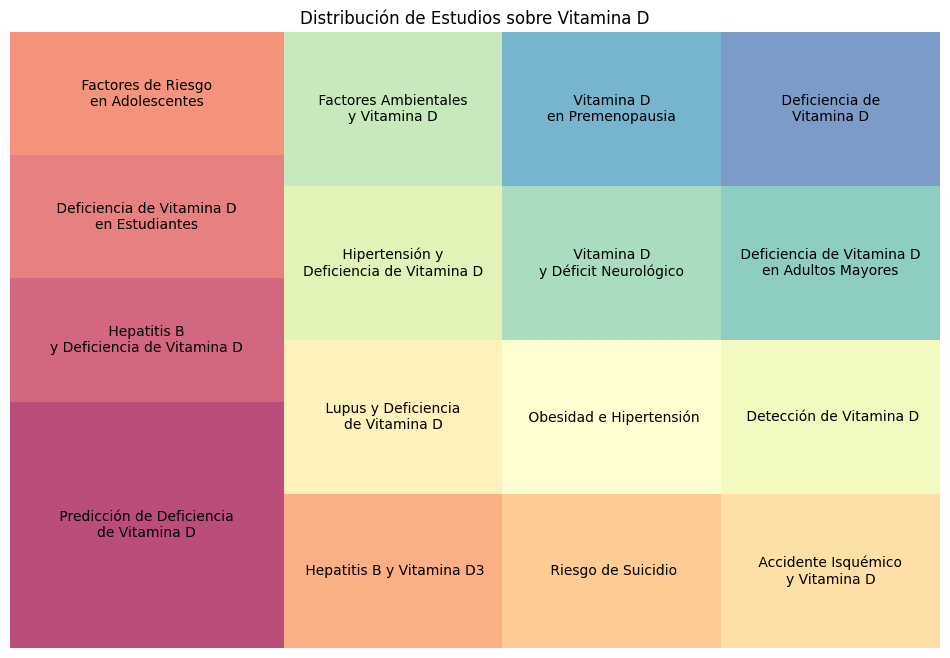

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

data = pd.read_csv('/content/area apliacion.csv', delimiter=';', encoding='ISO-8859-1')

areas = data['AreaAplicacion'].value_counts()
sizes = areas.values

umbral = min(sizes) * 0.53
labels = [label if size > umbral else '' for label, size in zip(areas.index, sizes)]
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7)
plt.title('Distribución de Estudios sobre Vitamina D')
plt.axis('off')
plt.show()


### Datos de entrenamiento más comunes

<ipython-input-7-59c74e09cfdd>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_analysis.head(15).index, y=frequency_analysis.head(15).values, palette="viridis")


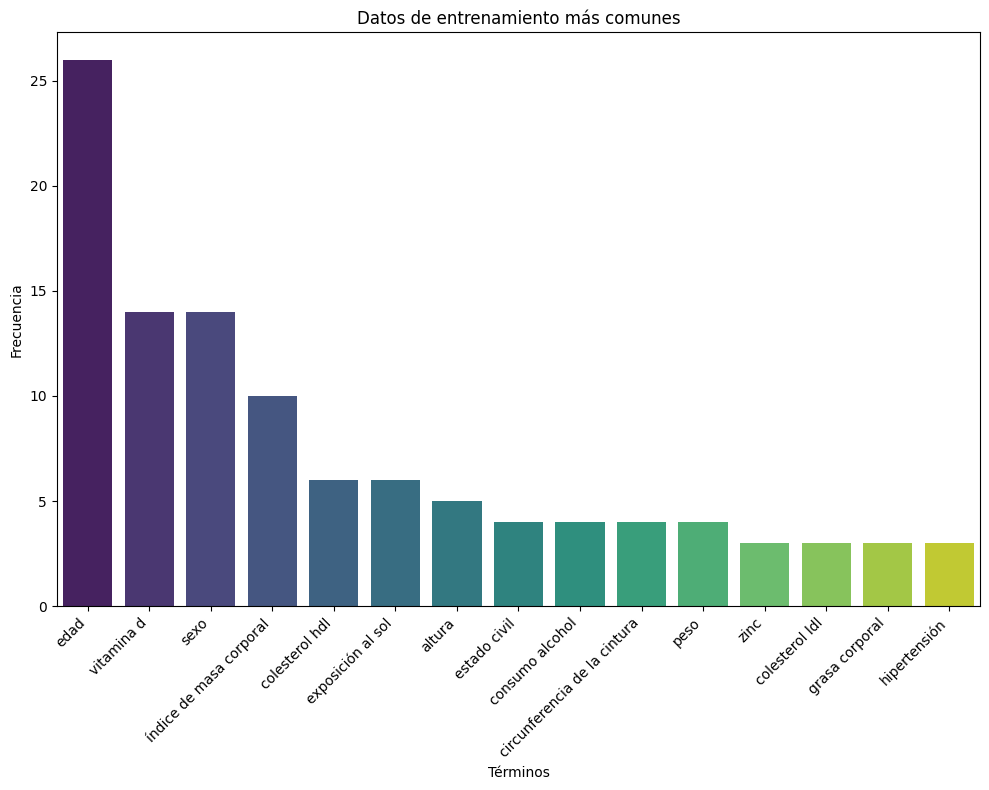

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

file_path = '/content/datosV2.csv'
data_modified = pd.read_csv(file_path, delimiter=';', encoding='utf-8-sig')
# Análisis de frecuencia de los datos simplificados
frequency_analysis = data_modified['Dato Simplificado'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=frequency_analysis.head(15).index, y=frequency_analysis.head(15).values, palette="viridis")
plt.title('Datos de entrenamiento más comunes')
plt.xlabel('Términos')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Algoritmos más comunes

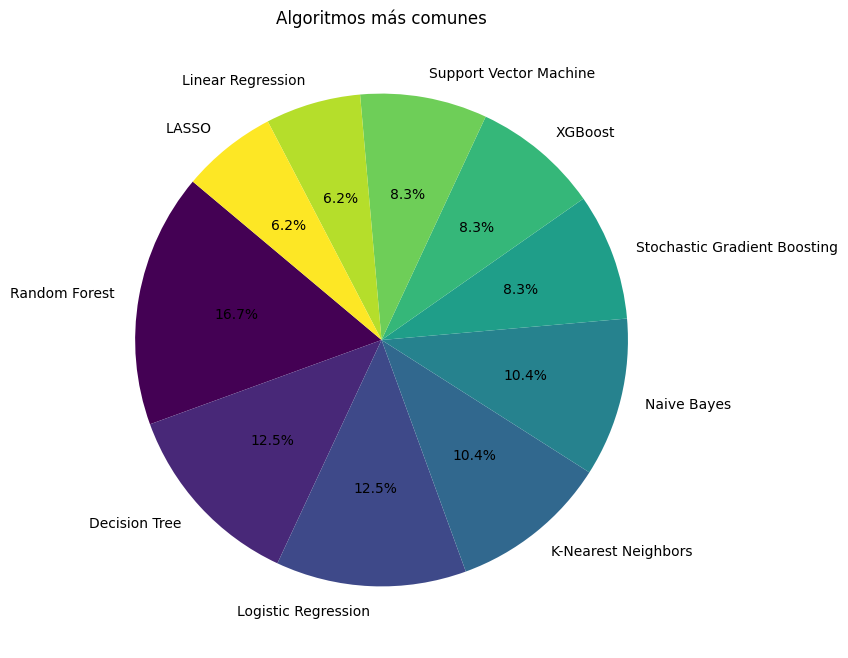

In [ ]:
df_corregido = pd.read_csv("/content/algoritmosV4.csv")

frecuencia_algoritmos_corregido = df_corregido["Algoritmo"].value_counts()

top_n_corregido = 10
frecuencia_algoritmos_top_n_corregido = frecuencia_algoritmos_corregido.head(top_n_corregido)

plt.figure(figsize=(8, 8))
frecuencia_algoritmos_top_n_corregido.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title('Algoritmos más comunes')
plt.ylabel('')
plt.show()

### Resultados de las investigaciones

<ipython-input-19-b9f2ec803b20>:34: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  point_plot = sns.pointplot(x='Resultado', y='Metrica_Simple', hue='Algoritmo', data=metric_avg,
<ipython-input-19-b9f2ec803b20>:34: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  point_plot = sns.pointplot(x='Resultado', y='Metrica_Simple', hue='Algoritmo', data=metric_avg,


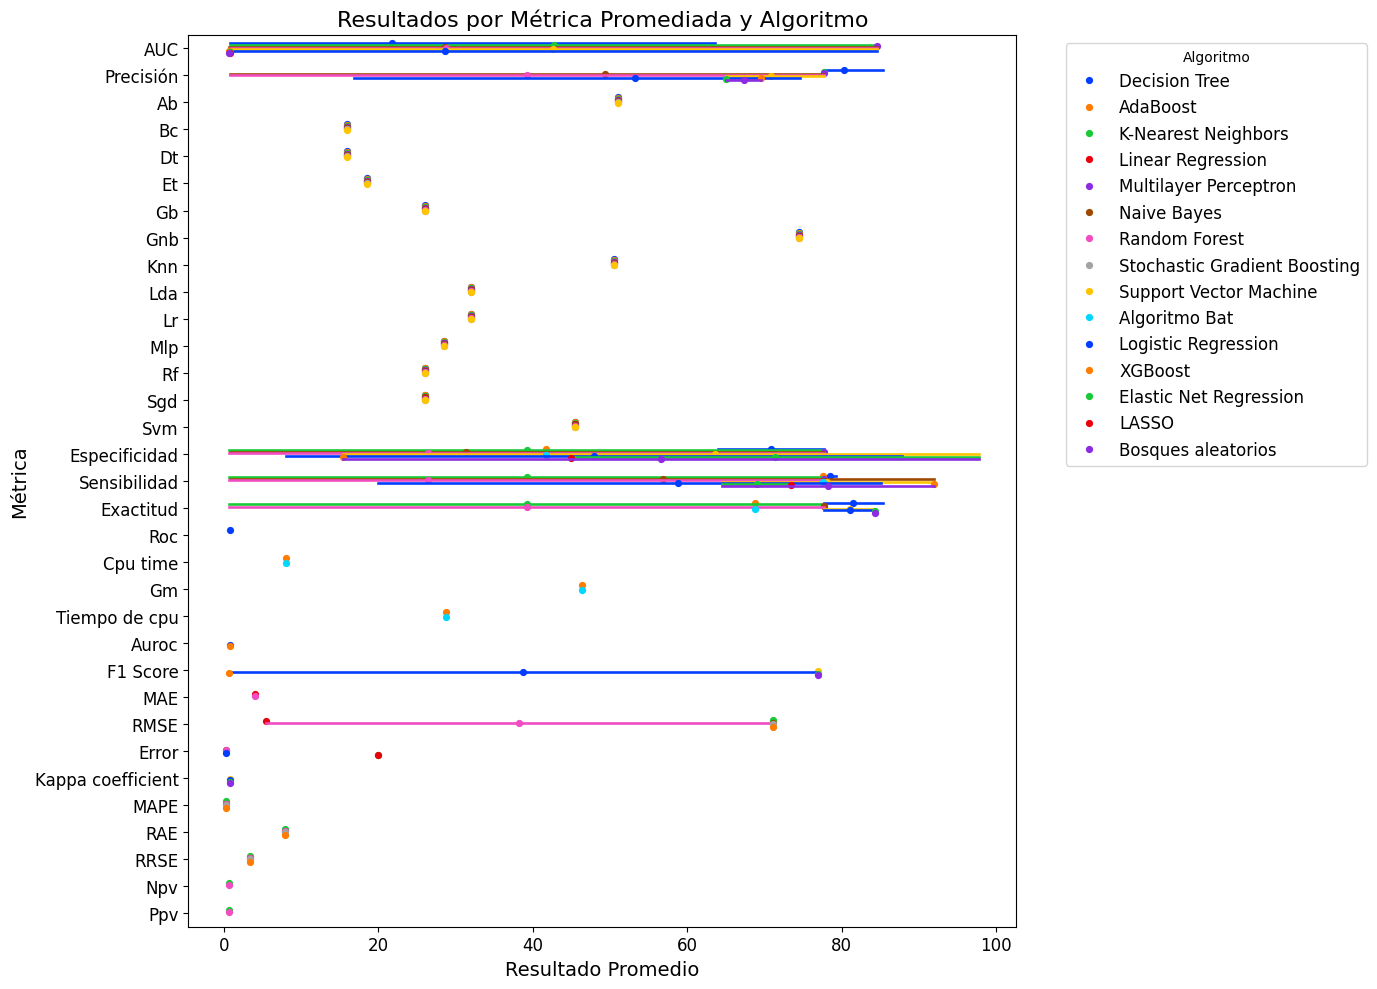

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Función para simplificar los nombres de las métricas
def simplify_metric_name(metric_name):
    simplified_name = re.sub(r'\s*\(.*?\)\s*', '', metric_name)
    simplified_name = re.sub(r'\b(training|test)\b', '', simplified_name, flags=re.IGNORECASE)
    simplified_name = simplified_name.strip()
    return simplified_name

# Cargar los datos de algoritmos
algoritmos_path = '/content/algoritmosV4.csv'
algoritmos_df = pd.read_csv(algoritmos_path, sep=',', encoding='utf-8-sig')

# Cargar los datos de resultados
resultados_path = '/content/resultadosV2.csv'
resultados_df = pd.read_csv(resultados_path, sep=';', encoding='utf-8-sig')

combined_df = pd.merge(resultados_df, algoritmos_df, on='id_Articulo', how='inner')
combined_df['Metrica'] = combined_df['Metrica'].apply(simplify_metric_name)
combined_df['Metrica_Simple'] = combined_df['Metrica'].apply(simplify_metric_name)
metric_avg = combined_df.groupby(['id_Articulo', 'Algoritmo', 'Metrica_Simple'])['Resultado'].mean().reset_index()

plt.figure(figsize=(14, 10))
point_plot = sns.pointplot(x='Resultado', y='Metrica_Simple', hue='Algoritmo', data=metric_avg,
                           palette='bright', dodge=True, join=False, scale=0.7)

point_plot.set_title('Resultados por Métrica Promediada y Algoritmo', fontsize=16)
point_plot.set_xlabel('Resultado Promedio', fontsize=14)
point_plot.set_ylabel('Métrica', fontsize=14)
point_plot.tick_params(labelsize=12)

point_plot.legend(title='Algoritmo', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

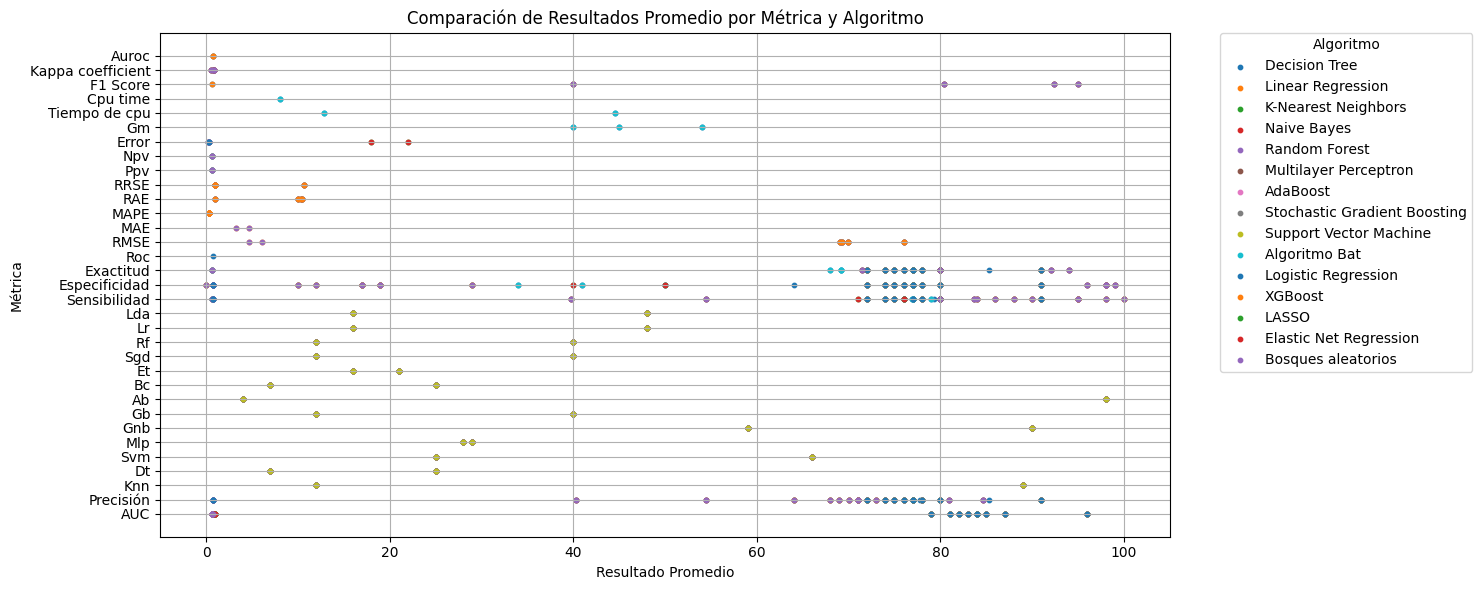

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

plt.figure(figsize=(15, 6))

for alg in combined_df['Algoritmo'].unique():
    alg_data = combined_df[combined_df['Algoritmo'] == alg]
    plt.scatter(alg_data['Resultado'], alg_data['Metrica'], label=alg, s=10)  # s es el tamaño del punto

plt.xlabel('Resultado Promedio')
plt.ylabel('Métrica')
plt.title('Comparación de Resultados Promedio por Métrica y Algoritmo')
plt.legend(title='Algoritmo', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.tight_layout()
plt.show()

## Escenarios de aplicación

### Predicción de riesgo de enfermedades óseas (Osteoporosis y Miomatosis uterina) utilizando Random Forest:

**Algoritmo:** Random Forest (SVM).

**Datos de entrada:** edad, sexo, exposición solar, peso, masa muscular esquelética, y el valor sérico de vitamina D.

**Objetivo:** Identificar patrones complejos y variables importantes que contribuyen al riesgo de estas enfermedades, lo cual es crítico para la prevención y el tratamiento tempran.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

palabras = '/content/vitDB.csv'
df_vitD = pd.read_csv(palabras, encoding='ISO-8859-1', sep=';')
df_vitD.head()

,ï»¿edad,Sexo,Exposicion_Solar,Diabetes,Ovario_Poliquistico,Hipertiroidismo,Hipotiroidismo,CÃ¡ncer,Fibromialgia,Osteoporosis,...,Peso_kg,Agua_Corporal_litros,ProteÃ­nas_kg,Minerales_kg,Masa_Grasa_Corp_kg,Muscular_Esquelet,IMC,Peso_Objetivo,Control_Peso,Grado_Obesidad
0,37,1,1,2,1,2,2,2,2,2,...,63.4,31.9,8.5,2.96,20.0,23.8,23.4,57.0,-6.4,111
1,39,1,1,2,1,2,2,2,2,2,...,62.0,29.3,7.9,2.86,22.0,21.8,25.9,52.0,-10.0,123
2,60,2,2,2,2,2,2,2,2,2,...,86.1,44.2,12.0,4.09,25.8,34.2,30.6,70.9,-15.2,139
3,53,2,2,2,2,1,2,2,2,2,...,76.3,37.6,10.2,3.51,25.0,28.7,28.4,60.3,-16.0,129
4,39,2,2,2,2,2,2,2,2,2,...,66.5,34.9,9.5,3.25,18.8,26.8,25.2,58.0,-8.5,115


In [ ]:
df_vitD['Diabetes'] = df_vitD['Diabetes'].apply(lambda x: 0 if x == 2 else 1)

y = df_vitD['Diabetes']
X = df_vitD[['Serico_Vitamina_D']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")


Error Cuadrático Medio (MSE): 0.022123511344597693
Coeficiente de Determinación (R^2): 0.003927489229275993


### Comparación de niveles de vitamina D entre grupos con diferentes condiciones de salud
**Algoritmo:** Regresión lineal o Máquinas de Vectores de Soporte (SVM) para correlación y clasificación.

**Datos a comparar:** Valor Sérico de Vitamina D entre pacientes con diabetes, síndrome de ovario poliquístico, hipertiroidismo, hipotiroidismo, cáncer, fibromialgia, osteoporosis, enfermedad hepática, síndrome de mala absorción, enfermedad renal, y miomatosis uterina.

**Objetivo:** Identificar si hay una correlación significativa entre los niveles de vitamina D y la presencia de estas condiciones específicas. Esto puede revelar patrones útiles para entender cómo la deficiencia de vitamina D podría estar asociada con la prevalencia de ciertas enfermedades.

In [ ]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Cargar los datos
# df = pd.read_csv('ruta_a_tu_archivo.csv') # Descomenta y ajusta la ruta a tu archivo CSV

# Preparar los datos
features = ['ï»¿edad', 'Sexo', 'Exposicion_Solar ', 'Peso_kg', 'Muscular_Esquelet', 'Serico_Vitamina_D']
X = df_vitD[features]
y = df_vitD[['Osteoporosis', 'Miomatosis_Uterina']]  # Ajusta esto si tus columnas tienen nombres diferentes

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento: Escalar las características numéricas
numeric_features = ['ï»¿edad', 'Peso_kg', 'Muscular_Esquelet', 'Serico_Vitamina_D']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Crear el modelo de Random Forest
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(random_state=42))])

# Entrenar el modelo
rf.fit(X_train, y_train)

# Para evaluar cada etiqueta individualmente, podrías hacer algo como esto:
from sklearn.metrics import accuracy_score, classification_report


for label in range(y_test.shape[1]):  # Asumiendo y_test es un DataFrame o un array 2D
    print(f"Etiqueta: {y_test.columns[label]}")
    print("Accuracy:", accuracy_score(y_test.iloc[:, label], y_pred[:, label]))
    print("Classification Report:\n", classification_report(y_test.iloc[:, label], y_pred[:, label]))

Etiqueta: Osteoporosis
Accuracy: 0.9886363636363636
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.99      1.00      0.99        87

    accuracy                           0.99        88
   macro avg       0.49      0.50      0.50        88
weighted avg       0.98      0.99      0.98        88

Etiqueta: Miomatosis_Uterina
Accuracy: 0.9886363636363636
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.99      1.00      0.99        87

    accuracy                           0.99        88
   macro avg       0.49      0.50      0.50        88
weighted avg       0.98      0.99      0.98        88



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p